In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import numpy as np
import networkx as nx

In [10]:
# Load data
data = pd.read_csv('final_processed_movies.csv',header=0)

1. Histogram of Movie Popularity

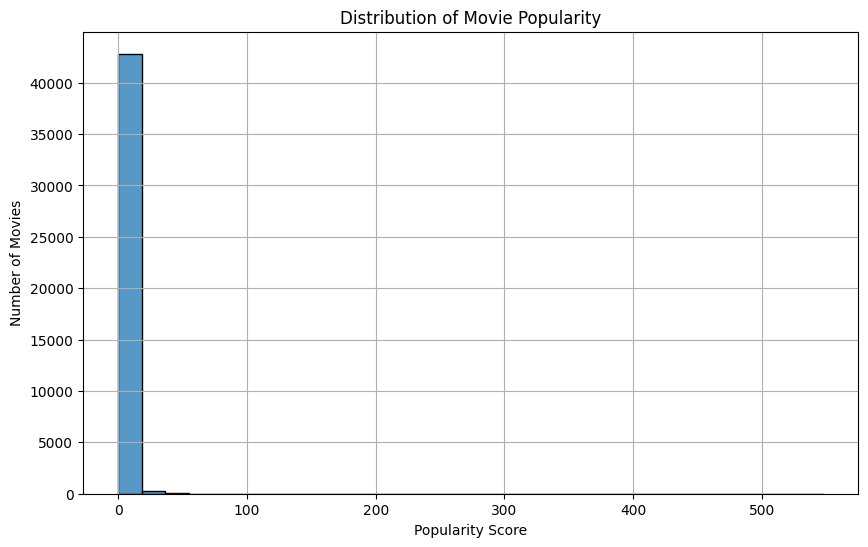

In [11]:
# Ensure 'popularity' is treated as a numeric column
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'].dropna(), bins=30, kde=False)  # Drop NA values for safety
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

2. Scatter Plot of Revenue vs. Budget

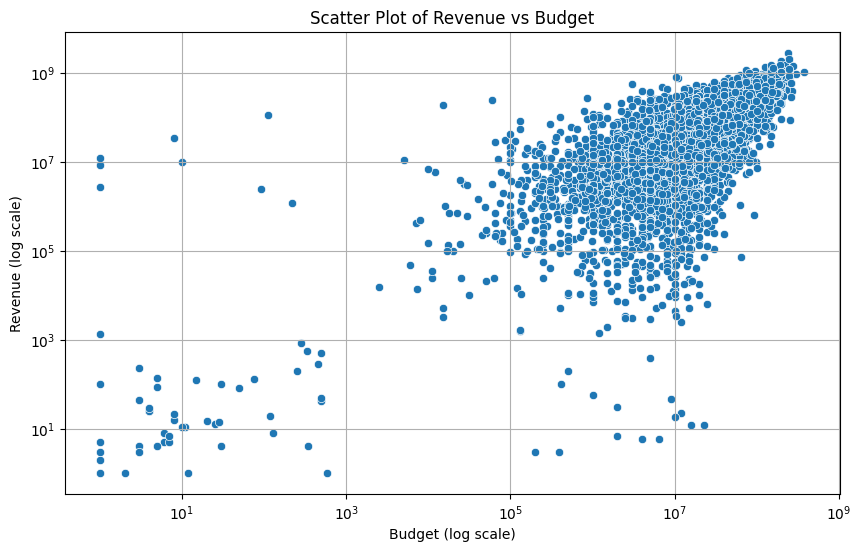

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Revenue vs Budget')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.grid(True)
plt.show()

3. Correlation Heatmap of Numeric Features

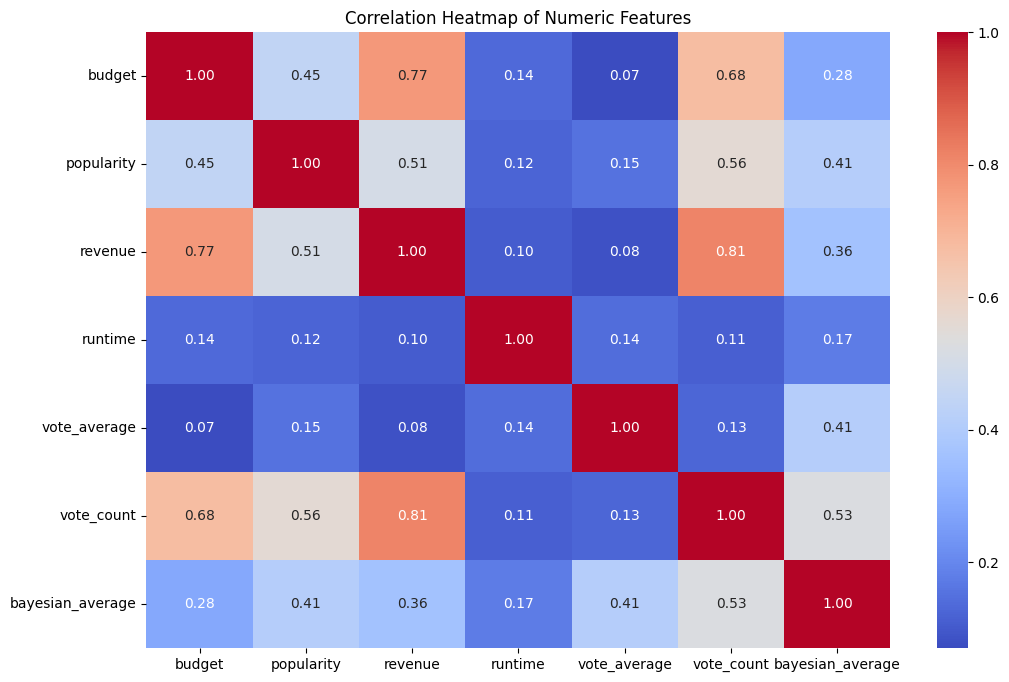

In [13]:
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

4. Time Series Analysis of Movie Releases and Revenue Over Years

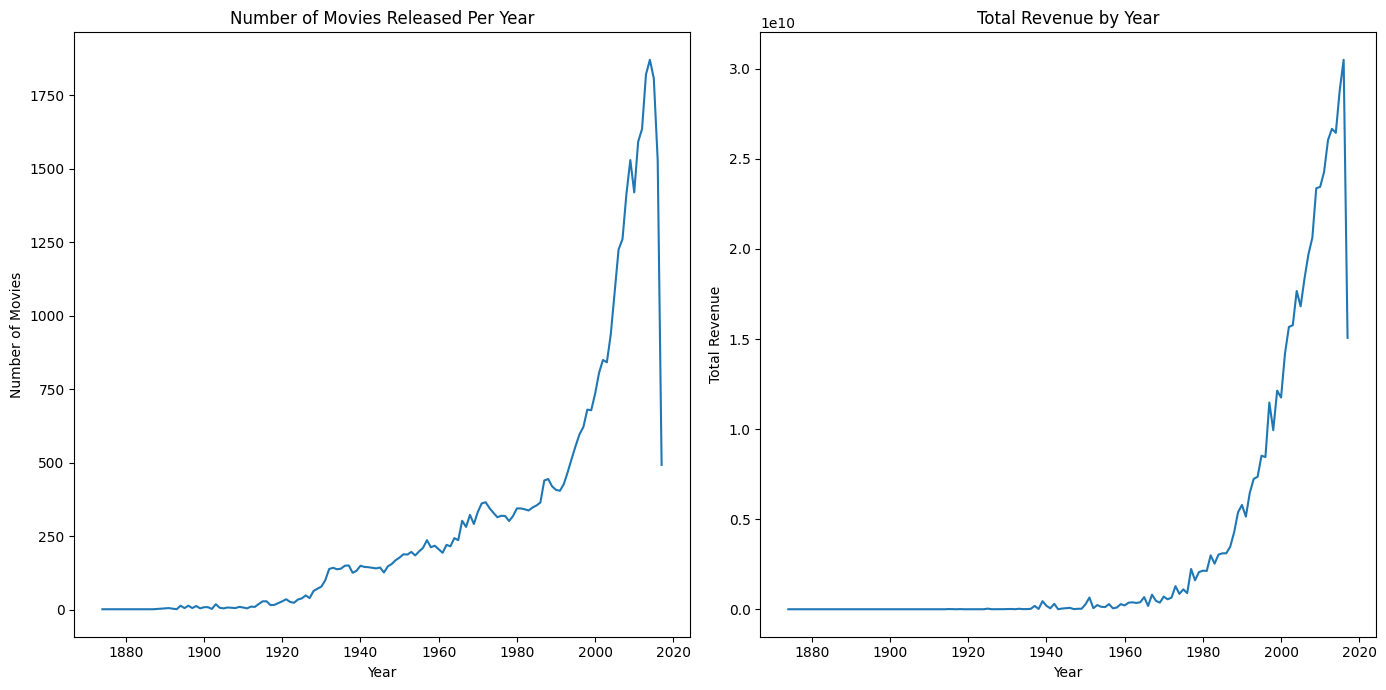

In [14]:
data['release_year'] = pd.to_datetime(data['release_date']).dt.year
yearly_data = data.groupby('release_year').agg({'title': 'count', 'revenue': 'sum'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(x=yearly_data.index, y=yearly_data['title'])
plt.title('Number of Movies Released Per Year')
plt.ylabel('Number of Movies')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
sns.lineplot(x=yearly_data.index, y=yearly_data['revenue'])
plt.title('Total Revenue by Year')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

5. Interactive Bubble Chart of Genres by Popularity and Revenue

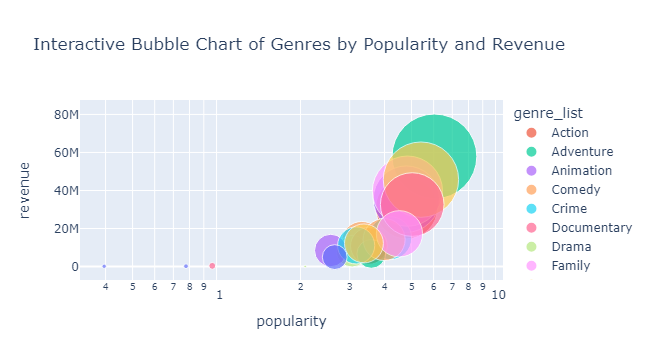

In [15]:
data['genre_list'] = data['genre_list'].str.strip('[]').str.replace("'", "").str.split(', ')
genre_data_exploded = data.explode('genre_list')
genre_data_exploded['popularity'] = genre_data_exploded['popularity'].astype(float)
genre_data_exploded['revenue'] = genre_data_exploded['revenue'].astype(float)

# Grouping data by genre and calculating average popularity and revenue
genre_summary = genre_data_exploded.groupby('genre_list').agg({'popularity': 'mean', 'revenue': 'mean'}).reset_index()

# Creating the interactive bubble chart
fig = px.scatter(genre_summary, x="popularity", y="revenue", size="revenue", color="genre_list", hover_name="genre_list",
                 log_x=True, size_max=60, title="Interactive Bubble Chart of Genres by Popularity and Revenue")
fig.show()

In [50]:
# Load data
database = pd.read_csv('final_processed_movies.csv',header=0)
#data1.columns = data1.iloc[0]  # Set the first row as the column header
#data1 = data1[1:]  # Remove the first row from the data

6. Box Plot of Movie ratings by Genre

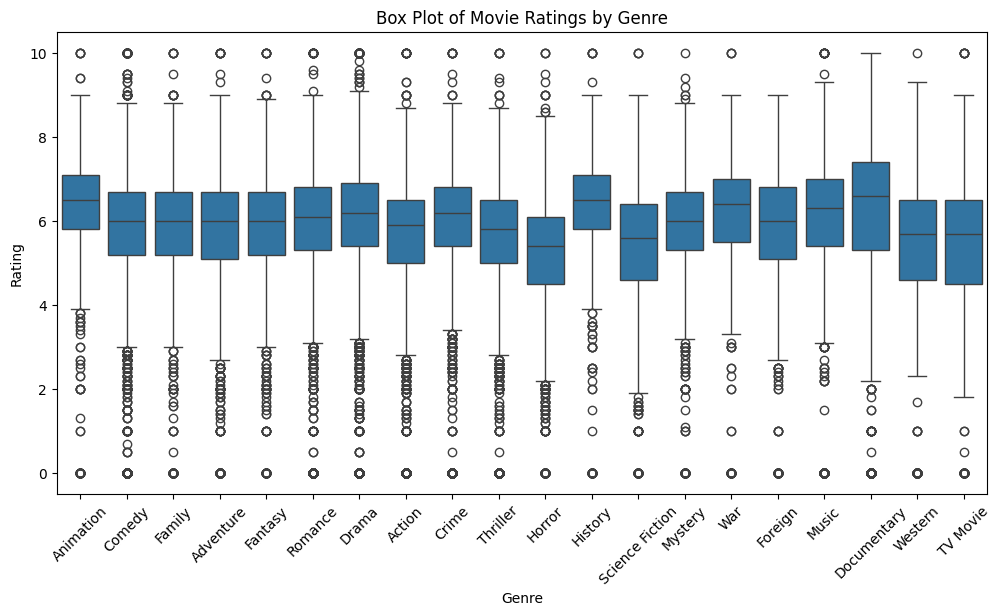

In [51]:
# Convert 'genre_list' from string of list to actual list and explode it
data = database.copy()
data['genre_list'] = data['genre_list'].apply(eval)
data_exploded = data.explode('genre_list')

# Reset the index after exploding the data
data_exploded = data_exploded.reset_index(drop=True)

# Convert 'vote_average' to numeric for plotting
data_exploded['vote_average'] = pd.to_numeric(data_exploded['vote_average'], errors='coerce')

# Creating a box plot of movie ratings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_list', y='vote_average', data=data_exploded)
plt.xticks(rotation=45)  # Rotate genre labels for better visibility
plt.title('Box Plot of Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

7. Stacked Bar Chart of Movies released per Year by genre

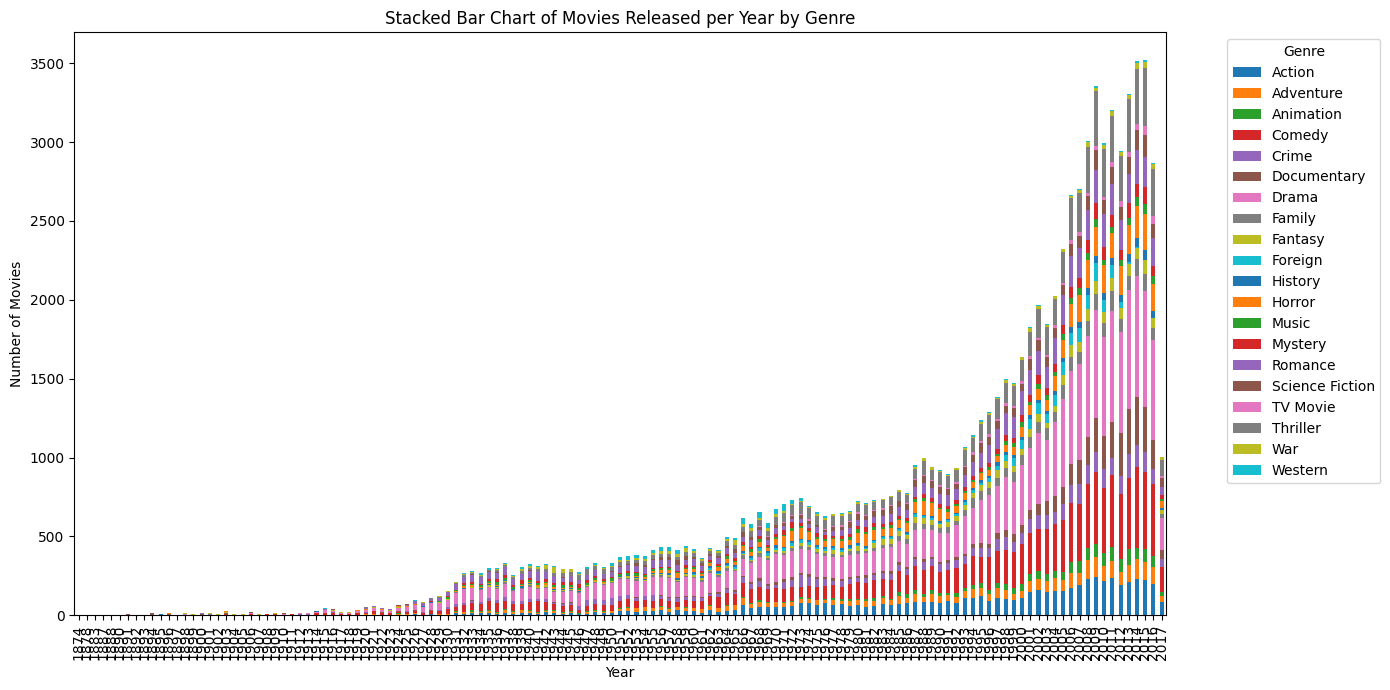

In [52]:
# Convert 'genre_list' from string of list to actual list
data = database.copy()
data['genre_list'] = data['genre_list'].apply(lambda x: eval(x))

# Exploding 'genre_list' so each genre gets its own row
data_exploded = data.explode('genre_list')

# Creating a new column 'release_year' extracted from 'release_date'
data_exploded['release_year'] = pd.to_datetime(data_exploded['release_date']).dt.year

# Creating a crosstab of the number of movies released per year for each genre
genre_year_data = pd.crosstab(data_exploded['release_year'], data_exploded['genre_list'])

# Plotting directly without calling plt.figure() separately
genre_year_data.plot(kind='bar', stacked=True, figsize=(14, 7), legend=True, title='Stacked Bar Chart of Movies Released per Year by Genre')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

8. Density Plot of Movie Budgets and Revenues

C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\222574547.py:21: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\222574547.py:22: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\222574547.py:30: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\222574547.py:31: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




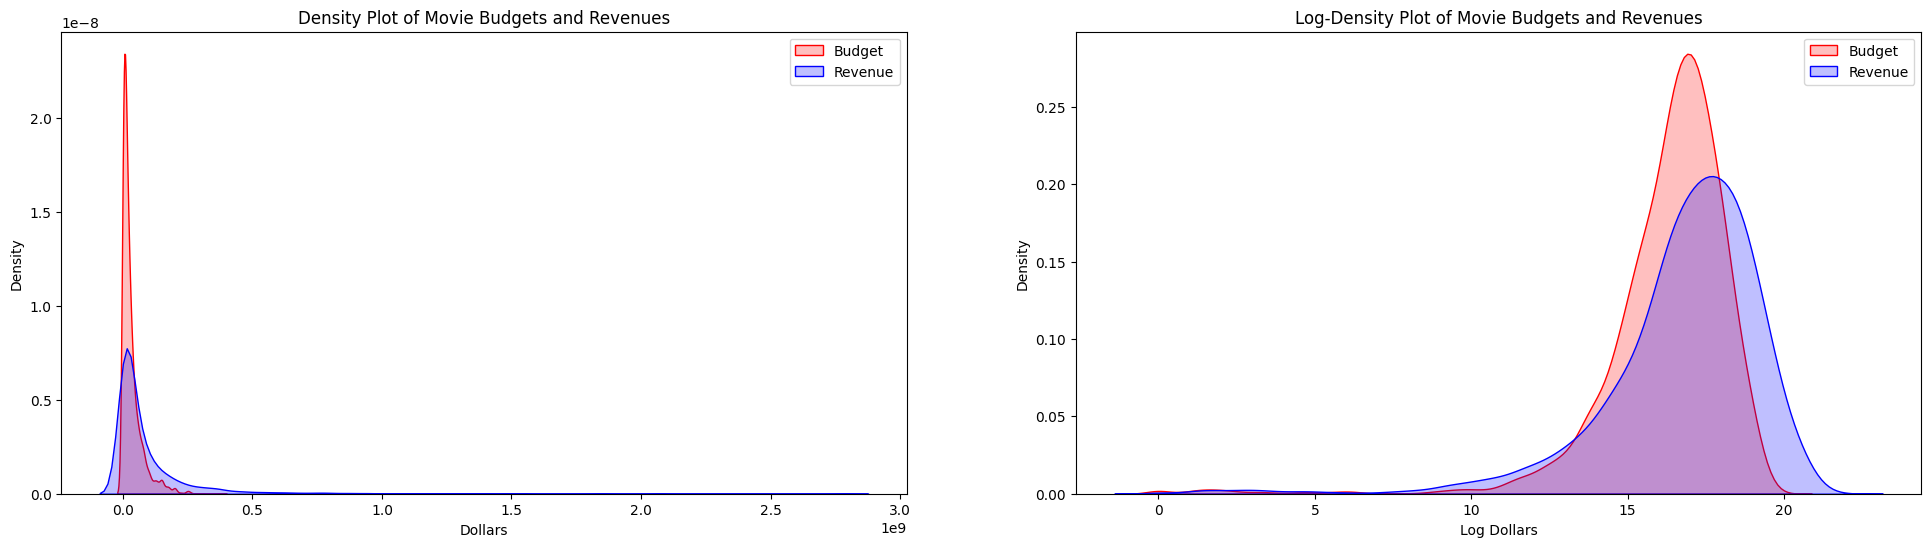

In [53]:
# Convert 'budget' and 'revenue' to numeric, coercing errors
data = database.copy()
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

# Drop NaN values specifically in 'budget' and 'revenue' columns
data = data.dropna(subset=['budget', 'revenue'])

# Filter out entries where budget or revenue is zero, as these do not contribute to meaningful density information
data = data[(data['budget'] > 0) & (data['revenue'] > 0)]

# Applying log transformation to manage wide distribution
data['log_budget'] = np.log(data['budget'])
data['log_revenue'] = np.log(data['revenue'])

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))

# Plot 1: Normal density plot
plt.subplot(1, 2, 1)
sns.kdeplot(data['budget'], shade=True, color="r", label="Budget")
sns.kdeplot(data['revenue'], shade=True, color="b", label="Revenue")
plt.title('Density Plot of Movie Budgets and Revenues')
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.legend()

# Plot 2: Log-density plot
plt.subplot(1, 2, 2)
sns.kdeplot(data['log_budget'], shade=True, color="r", label="Budget")
sns.kdeplot(data['log_revenue'], shade=True, color="b", label="Revenue")
plt.title('Log-Density Plot of Movie Budgets and Revenues')
plt.xlabel('Log Dollars')
plt.ylabel('Density')
plt.legend()

plt.show()

9. Network Graph of Co-occurrences of Genres in Movies

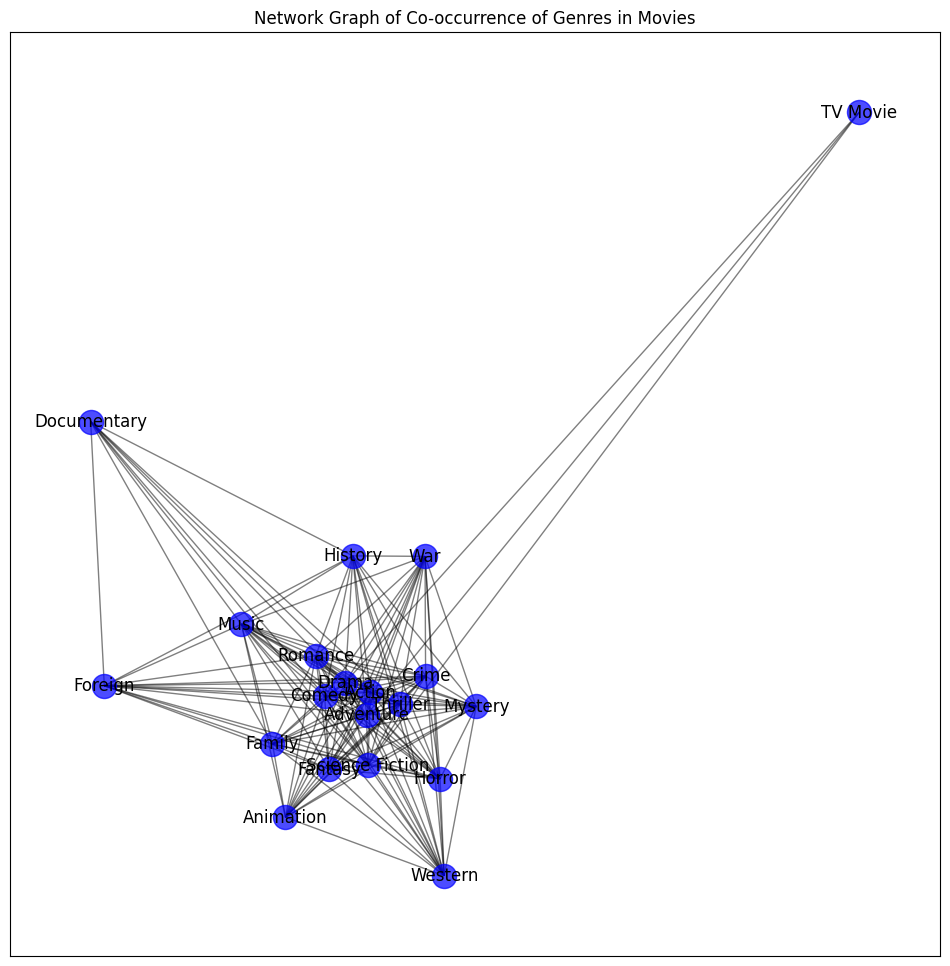

In [54]:
# Convert 'genre_list' from string of list to actual list
data['genre_list'] = data['genre_list'].apply(eval)

# Initialize graph
G = nx.Graph()

# Add nodes and edges from the 'genre_list'
for index, row in data.iterrows():
    genres = row['genre_list']
    for genre in genres:
        if not G.has_node(genre):
            G.add_node(genre)
    for i in range(len(genres)):
        for j in range(i + 1, len(genres)):
            if G.has_edge(genres[i], genres[j]):
                # Increment the weight by 1 if the edge already exists
                G[genres[i]][genres[j]]['weight'] += 1
            else:
                # Add a new edge with weight 1 if it doesn't exist
                G.add_edge(genres[i], genres[j], weight=1)

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title('Network Graph of Co-occurrence of Genres in Movies')
plt.show()